In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data,city_data, on="city", how = "inner")

# Display the data table for preview
city_ride_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban
5,Lake Jonathanshire,2018-04-06 11:30:32,16.84,6164453571846,5,Urban
6,Lake Jonathanshire,2018-03-21 00:18:34,37.95,8353656732934,5,Urban
7,Lake Jonathanshire,2018-01-28 00:07:00,5.67,9756573174778,5,Urban
8,Lake Jonathanshire,2018-01-24 12:24:22,34.65,3319117904437,5,Urban
9,Lake Jonathanshire,2018-03-24 16:27:49,14.94,1670908453476,5,Urban


In [2]:
avg_tot = city_ride_data[['city','fare','type','date']].groupby(['city','type'], as_index = False).agg({'fare':'mean','date':'count'}).rename(index=str, columns={"date": "tot_rides"})
#avg_tot.keys()
avg_urb = avg_tot.loc[avg_tot['type'] == 'Urban']
#table[table.column_name == some_value]
avg_sub = avg_tot.loc[avg_tot['type'] == 'Suburban']
avg_rur = avg_tot.loc[avg_tot['type'] == 'Rural']


## Bubble Plot of Ride Sharing Data

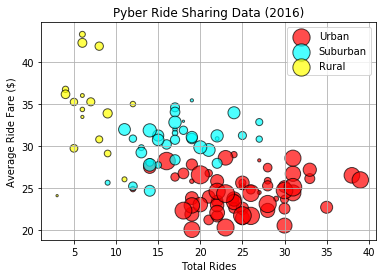

In [8]:
# Obtain the x and y coordinates for each of the three city types
x_urb = avg_urb['tot_rides']
y_urb = avg_urb['fare']
x_sub = avg_sub['tot_rides']
y_sub = avg_sub['fare']
x_rur = avg_rur['tot_rides']
y_rur = avg_rur['fare']

# Store total amount of rides in a list
tot_rides = avg_tot['tot_rides']
# Used to mark the size of each point based on total amount of rides
s = [5*n for n in range(len(tot_rides))]

# Build the scatter plots for each city types
plt.scatter(x_urb,y_urb, s = s, alpha = 0.7, c = 'red', edgecolors='black')
plt.scatter(x_sub,y_sub, s = s, alpha = 0.7, c = 'cyan', edgecolors='black')
plt.scatter(x_rur,y_rur, s = s, alpha = 0.7, c = 'yellow', edgecolors='black')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Rides")
plt.ylabel("Average Ride Fare ($)")
plt.grid()

# Create a legend
plt.legend(labels = ['Urban','Suburban','Rural'])

# Save Figure
plt.savefig('BubbleRideShare.png')

plt.show()

## Total Fares by City Type

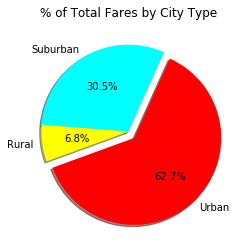

In [11]:
# Calculate Type Percents
urb_fare_per = city_ride_data.loc[city_ride_data['type'] == 'Urban']['fare'].sum()
sub_fare_per = city_ride_data.loc[city_ride_data['type'] == 'Suburban']['fare'].sum()
rur_fare_per = city_ride_data.loc[city_ride_data['type'] == 'Rural']['fare'].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urb_fare_per, sub_fare_per, rur_fare_per]

# The colors of each section of the pie chart
colors = ["red", "cyan", "yellow"]

# Tells matplotlib to seperates Urban slice
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure

plt.savefig('PieTotFare.png')

## Total Rides by City Type

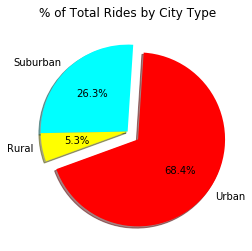

In [10]:
# Calculate Ride Percents
urb_rides_per = city_ride_data.loc[city_ride_data['type'] == 'Urban']['ride_id'].count()
sub_rides_per = city_ride_data.loc[city_ride_data['type'] == 'Suburban']['ride_id'].count()
rur_rides_per = city_ride_data.loc[city_ride_data['type'] == 'Rural']['ride_id'].count()

# Build Pie Chart

# Labels for the sections of our pie chart
labels2 = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes2 = [urb_rides_per,sub_rides_per,rur_rides_per]

# The colors of each section of the pie chart
colors2 = ["red", "cyan", "yellow"]

# Tells matplotlib to seperate Urban slice
explode2 = (0.15, 0, 0)

plt.title("% of Total Rides by City Type")

plt.pie(sizes2, explode=explode2, labels=labels2, colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure
plt.savefig('PieTotRides.png')

## Total Drivers by City Type

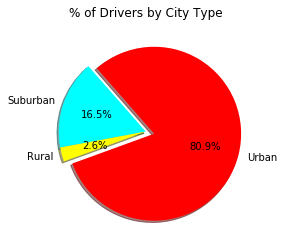

In [9]:
# Calculate Driver Percents
tot_drivers = city_data['driver_count'].sum()
tot_urb_drivers = city_data.loc[city_data['type'] == 'Urban']['driver_count'].sum()
tot_sub_drivers = city_data.loc[city_data['type'] == 'Suburban']['driver_count'].sum()
tot_rur_drivers = city_data.loc[city_data['type'] == 'Rural']['driver_count'].sum()

# Build Pie Charts

# Labels for the sections of our pie chart
labels3 = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes3 = [tot_urb_drivers,tot_sub_drivers,tot_rur_drivers]

# The colors of each section of the pie chart
colors3 = ["red", "cyan", "yellow"]

# Tells matplotlib to seperate the "Python" section from the others
explode3 = (0.1, 0, 0)

plt.title("% of Drivers by City Type")

plt.pie(sizes3, explode=explode3, labels=labels3, colors=colors3,
        autopct="%1.1f%%", shadow=True, startangle=200)

# Save Figure
plt.savefig('PieTotDrivers.png')